$y=\beta x + \beta_0 + \epsilon$


$\epsilon \sim \mathcal(N)(0, \sigma)$

$\beta=4, \beta_0 = 5$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb

In [2]:
!conda install -y -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.6.14

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [5]:
X = np.linspace(-15, 15, 200)
X[0:10]

array([-15.        , -14.84924623, -14.69849246, -14.54773869,
       -14.39698492, -14.24623116, -14.09547739, -13.94472362,
       -13.79396985, -13.64321608])

In [7]:
y_true = 4*X + 5
y_true[0:10]

array([-55.        , -54.39698492, -53.79396985, -53.19095477,
       -52.5879397 , -51.98492462, -51.38190955, -50.77889447,
       -50.1758794 , -49.57286432])

In [9]:
y_noisy = y_true + np.random.randn(len(X))*1.5
y_noisy[0:10]

array([-54.73816064, -55.5136937 , -54.33793   , -54.01317661,
       -53.14111513, -53.9430757 , -48.64206156, -51.5817964 ,
       -51.69977669, -49.16725288])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y_noisy, test_size=.2, random_state =2)
X_train.shape, X_val.shape

((160,), (40,))

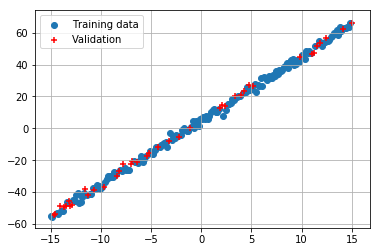

In [13]:
plt.scatter(X_train, y_train, label = 'Training data')
plt.scatter(X_val, y_val, c='red', marker='+', label = 'Validation')
plt.grid(True)
plt.legend()

In [14]:
xgb_reg = xgb.XGBRegressor()
xgb_reg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [18]:
X_train = X_train[:, np.newaxis]


(160, 1)

In [19]:
X_val= np.expand_dims(X_val, axis = 1)
X_val.shape

(40, 1)

In [20]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])

[0]	validation_0-rmse:31.3833	validation_1-rmse:34.2065
[1]	validation_0-rmse:28.4431	validation_1-rmse:31.0321
[2]	validation_0-rmse:25.7798	validation_1-rmse:28.1653
[3]	validation_0-rmse:23.3741	validation_1-rmse:25.5303
[4]	validation_0-rmse:21.1994	validation_1-rmse:23.2448
[5]	validation_0-rmse:19.2329	validation_1-rmse:21.0905
[6]	validation_0-rmse:17.4433	validation_1-rmse:19.1654
[7]	validation_0-rmse:15.829	validation_1-rmse:17.4282
[8]	validation_0-rmse:14.3755	validation_1-rmse:15.8688
[9]	validation_0-rmse:13.0506	validation_1-rmse:14.4456
[10]	validation_0-rmse:11.8527	validation_1-rmse:13.2004
[11]	validation_0-rmse:10.7703	validation_1-rmse:12.0473
[12]	validation_0-rmse:9.78693	validation_1-rmse:11.026
[13]	validation_0-rmse:8.9003	validation_1-rmse:10.0384
[14]	validation_0-rmse:8.09435	validation_1-rmse:9.19183
[15]	validation_0-rmse:7.36797	validation_1-rmse:8.41542
[16]	validation_0-rmse:6.7098	validation_1-rmse:7.688
[17]	validation_0-rmse:6.11248	validation_1-rms

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [21]:
result = xgb_reg.evals_result()
result

{'validation_0': {'rmse': [31.383316,
   28.443073,
   25.779819,
   23.374105,
   21.199375,
   19.232855,
   17.443323,
   15.828955,
   14.375546,
   13.05057,
   11.852654,
   10.7703,
   9.78693,
   8.900305,
   8.094347,
   7.367967,
   6.709801,
   6.112479,
   5.572667,
   5.083337,
   4.641174,
   4.243147,
   3.883737,
   3.559411,
   3.26767,
   3.005411,
   2.769189,
   2.557618,
   2.368414,
   2.199307,
   2.048188,
   1.914395,
   1.796238,
   1.692127,
   1.600299,
   1.519955,
   1.44966,
   1.388371,
   1.335463,
   1.289112,
   1.249037,
   1.211885,
   1.179169,
   1.153077,
   1.128652,
   1.106905,
   1.089465,
   1.071241,
   1.056195,
   1.044925,
   1.034688,
   1.022643,
   1.009294,
   1.001647,
   0.989566,
   0.98013,
   0.975367,
   0.967653,
   0.960941,
   0.955078,
   0.951887,
   0.946712,
   0.944067,
   0.939839,
   0.936004,
   0.933913,
   0.928656,
   0.92673,
   0.921631,
   0.917193,
   0.915539,
   0.914589,
   0.912915,
   0.911584,
   0.91081

In [23]:
iteration = len(result['validation_0']['rmse'])
iteration

100

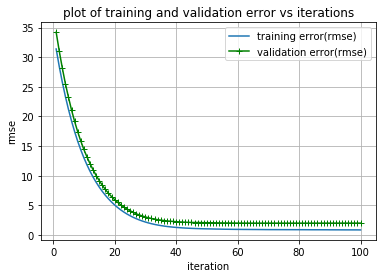

In [28]:
plt.plot(range(1, iteration+1) , result['validation_0']['rmse'], label= 'training error(rmse)')
plt.plot(range(1, iteration +1) , result['validation_1']['rmse'],c= 'green',marker='+',label= 'validation error(rmse)')
plt.grid(True)
plt.xlabel('iteration')
plt.ylabel('rmse')
plt.title('plot of training and validation error vs iterations')
plt.legend()

In [31]:
X_train.shape, y_train.shape

((160, 1), (160,))

In [34]:
np.corrcoef(X_train.ravel(), y_train)

array([[1.       , 0.9988353],
       [0.9988353, 1.       ]])

In [35]:
y_pred = xgb_reg.predict(X_train)

In [36]:
residual = y_pred- y_train

(array([ 4.,  8., 14., 25., 61., 28.,  8.,  8.,  3.,  1.]),
 array([-2.38737583, -1.85090426, -1.31443269, -0.77796111, -0.24148954,
         0.29498203,  0.8314536 ,  1.36792517,  1.90439674,  2.44086831,
         2.97733989]),
 <a list of 10 Patch objects>)

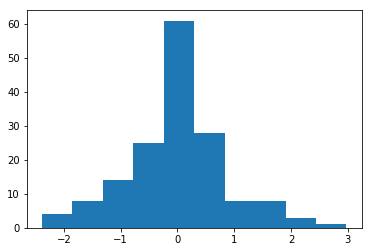

In [37]:
plt.hist(residual)

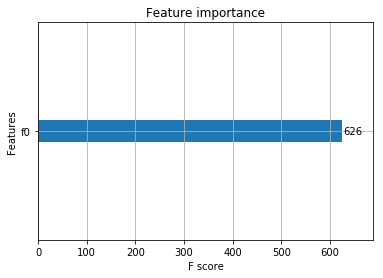

In [39]:
xgb.plot_importance(xgb_reg)

In [41]:
x_new = np.array([-100, 200])
4*x_new + 5

array([-395,  805])

In [42]:
np.min(y_pred), np.max(y_pred)

(-55.03706, 65.4101)

In [45]:
xgb_reg.predict(x_new[:, np.newaxis])

array([-54.702652,  65.4101  ], dtype=float32)